In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("dataset.csv")  

In [33]:
t_min = df['timestamp'].min()
t_max = df['timestamp'].max()

print("Raw timestamp range:", t_min, "to", t_max)

time_range_s = (t_max - t_min) / 1e9  # nano seconds
print("Total duration (seconds):", time_range_s)
print("Total duration (minutes):", time_range_s / 60)
print("Total duration (hours):", time_range_s / 3600)

Raw timestamp range: 73452342000 to 209397361451000
Total duration (seconds): 209323.909109
Total duration (minutes): 3488.7318184833334
Total duration (hours): 58.145530308055555


In [4]:
print(df.head())

   user activity      timestamp  x-axis  y-axis  z-axis
0     1  Walking  4991922345000    0.69   10.80   -2.03
1     1  Walking  4991972333000    6.85    7.44   -0.50
2     1  Walking  4992022351000    0.93    5.63   -0.50
3     1  Walking  4992072339000   -2.11    5.01   -0.69
4     1  Walking  4992122358000   -4.59    4.29   -1.95


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB
None


In [7]:
print(df['activity'].value_counts())

activity
Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: count, dtype: int64


In [34]:
print(f"Number of users for which data was recorded {len(df['user'].unique())}")

Number of users for which data was recorded 36


Number of users per number of activities:
activity
1     1
2     2
4    10
5     4
6    19
Name: count, dtype: int64


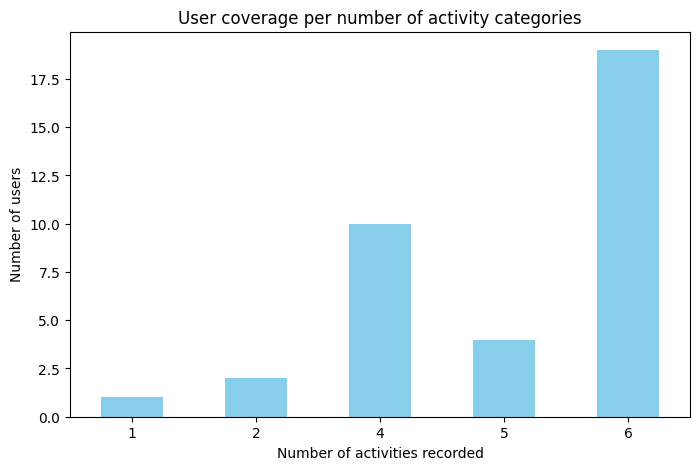

In [32]:
activity_counts_per_user = df.groupby("user")["activity"].nunique()

# count how many users have 1, 2, 3... activities
users_per_activity_count = activity_counts_per_user.value_counts().sort_index()

print("Number of users per number of activities:")
print(users_per_activity_count)

# plot
plt.figure(figsize=(8,5))
users_per_activity_count.plot(kind='bar', color='skyblue')
plt.xlabel("Number of activities recorded")
plt.ylabel("Number of users")
plt.title("User coverage per number of activity categories")
plt.xticks(rotation=0)
plt.show()

In [30]:
user_activity_matrix = pd.crosstab(df['user'], df['activity'])

print(user_activity_matrix)

activity  Downstairs  Jogging  Sitting  Standing  Upstairs  Walking
user                                                               
1               2941    11056        0         0      3120    12861
2                  0    11786        0         0         0    11739
3               3326    11018     1609      2824      3411    12970
4               1761      895     1257         0      1377     6079
5               3281     6405     1664      1515      3387    12257
6               1431    10961     1679       709      1661    12262
7               2257     9183     2529      2364      3601    11033
8               3345    10313     2699      3269      4453    17108
9                  0        0        0         0         0    12923
10              3792    12084        0      1659      4294    13046
11              2674    12454        0         0      4392    12138
12              2870    12360     2289      1670      2654    10798
13              4240    11301     1179      1659

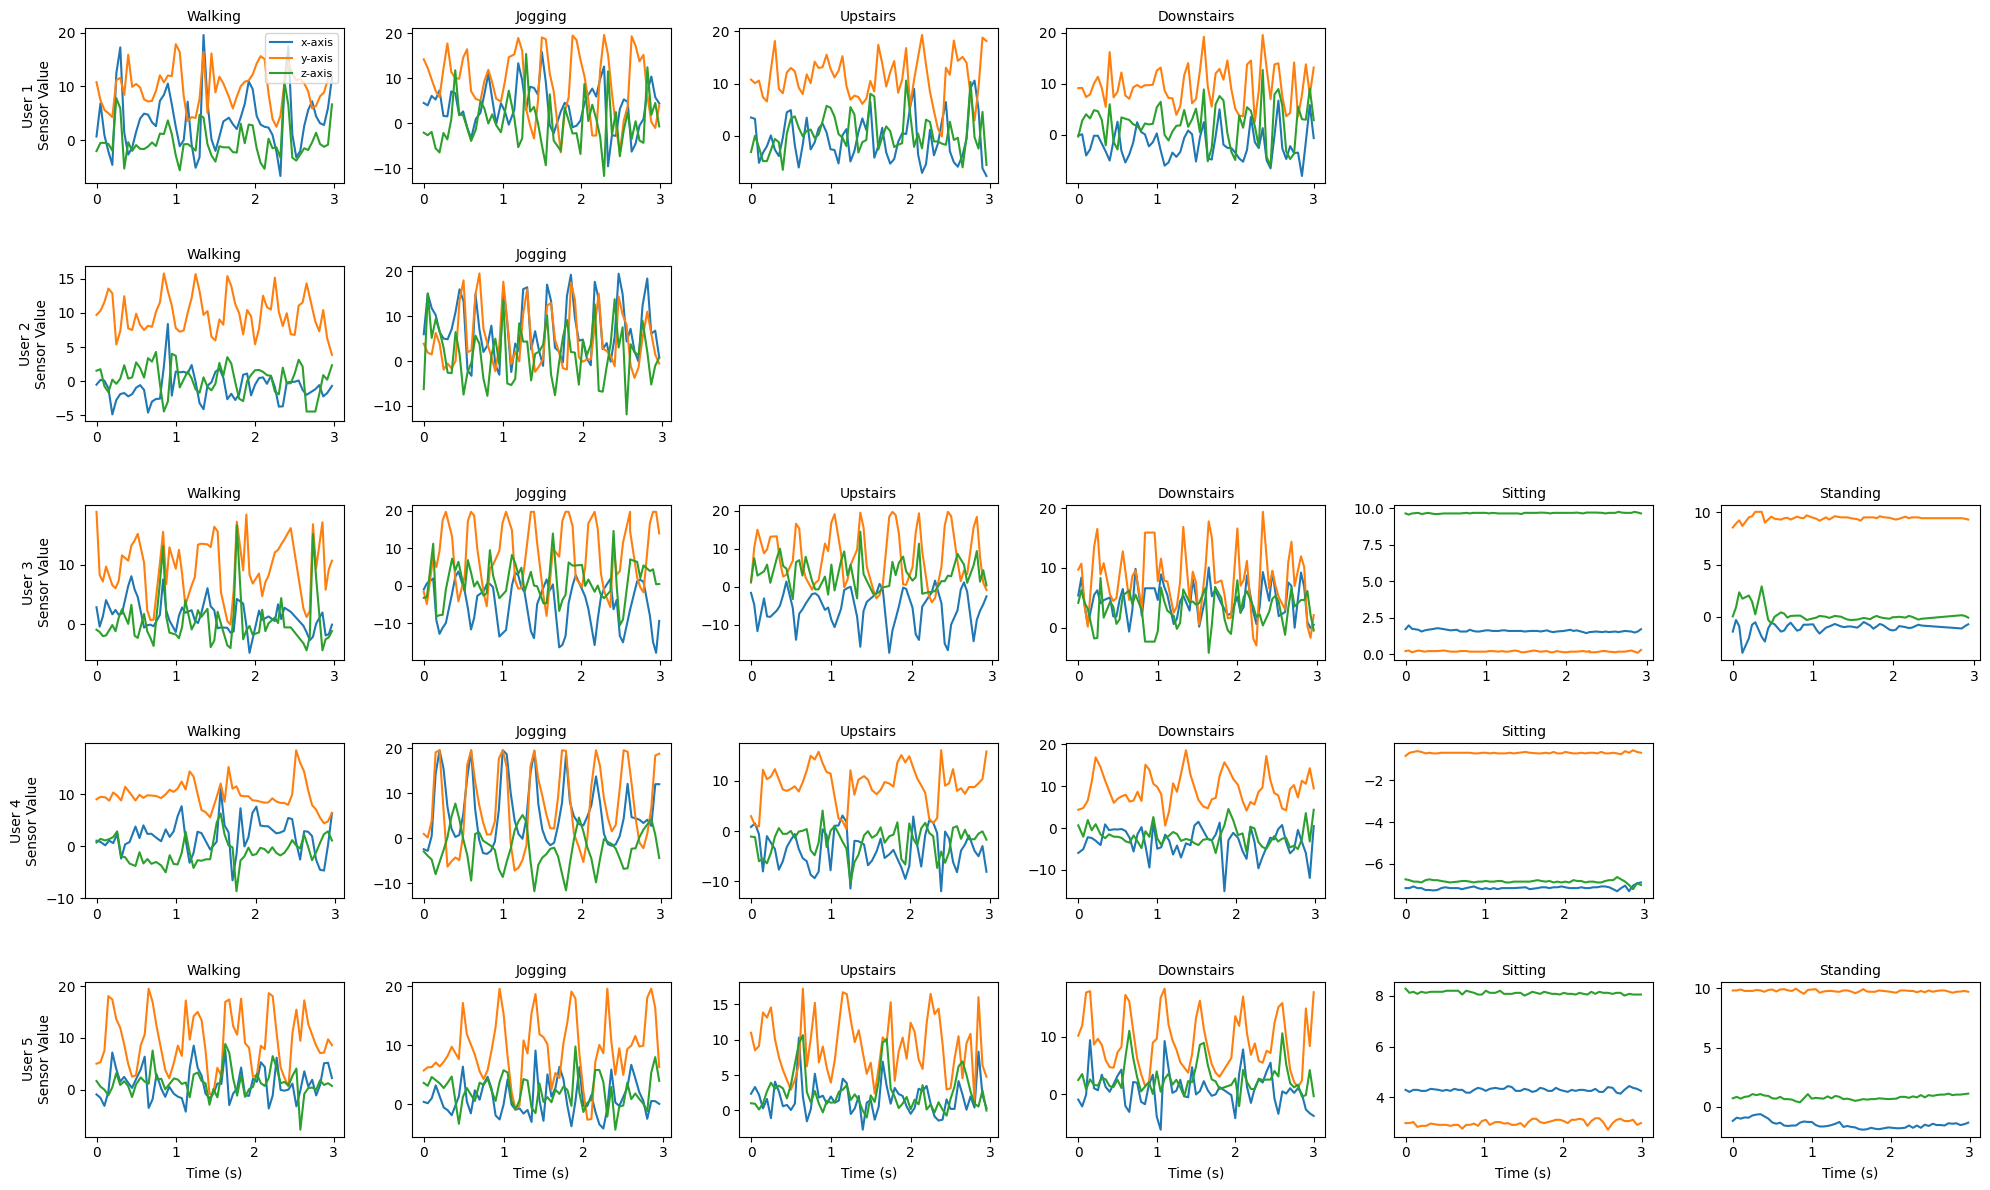

In [36]:
import matplotlib.pyplot as plt

activities = ["Walking", "Jogging", "Upstairs", "Downstairs", "Sitting", "Standing"]
users = df['user'].unique()[:5]  # let's do 5 users for spacing

fig, axes = plt.subplots(len(users), len(activities), figsize=(20, 12), sharex=False, sharey=False)

for i, user in enumerate(users):
    for j, activity in enumerate(activities):
        ax = axes[i, j]
        
        # filter by user + activity
        df_act = df[(df['user'] == user) & (df['activity'] == activity)].copy()
        if df_act.empty:
            ax.axis("off")
            continue
        
        # normalize time to start from 0
        t0 = df_act['timestamp'].iloc[0]
        df_act['time_s'] = (df_act['timestamp'] - t0) / 1e9
        
        # keep only first 3 seconds
        df_act = df_act[df_act['time_s'] <= 3]
        
        # plot 3 axes
        ax.plot(df_act['time_s'], df_act['x-axis'], label="x-axis")
        ax.plot(df_act['time_s'], df_act['y-axis'], label="y-axis")
        ax.plot(df_act['time_s'], df_act['z-axis'], label="z-axis")
        
        # subplot title as the activity
        ax.set_title(activity, fontsize=10, pad=5)  # pad moves the title a bit above
        
        # y-axis label only on first column
        if j == 0:
            ax.set_ylabel(f"User {user}\nSensor Value", fontsize=10)
        
        # x-axis label only on last row
        if i == len(users)-1:
            ax.set_xlabel("Time (s)")
        
        # legend only once per figure to reduce clutter
        if i == 0 and j == 0:
            ax.legend(fontsize=8, loc="upper right")

plt.tight_layout(h_pad=3, w_pad=2)  # more space between rows/columns
plt.show()
